In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

currentDir = os.getcwd()
currentFileCSV2021 = currentDir +"\\" + "batpitch2021.csv"
# csvFileObj = open(currentFileCSV)
batpitch2021 = pd.read_csv(currentFileCSV2021)
currentFileCSV2019 = currentDir +"\\" + "batpitch2019.csv"
batpitch2019 = pd.read_csv(currentFileCSV2019)

def f_z_norm(data):
    mean = np.mean(data)
    std = np.std(data)
    z_norm = [(y-mean)/std for y in data]
    return z_norm

batpitch2021.head()

,Tm,Team,Bat,Pitch,Rank
0,Arizona Diamondbacks,ARI,4.19,5.51,1
1,Atlanta Braves,ATL,4.91,4.07,11
2,Baltimore Orioles,BAL,4.07,5.90,1
3,Boston Red Sox,BOS,5.12,4.62,12
4,Chicago Cubs,CHC,4.35,5.18,5


In [2]:
batpitch2021['z_Bat'] = f_z_norm(batpitch2021['Bat']) 
batpitch2021['z_Pitch'] = f_z_norm(batpitch2021['Pitch']) 

batpitch2021.head()


,Tm,Team,Bat,Pitch,Rank,z_Bat,z_Pitch
0,Arizona Diamondbacks,ARI,4.19,5.51,1,-0.799136,1.760262
1,Atlanta Braves,ATL,4.91,4.07,11,0.888189,-0.827126
2,Baltimore Orioles,BAL,4.07,5.90,1,-1.080356,2.461013
3,Boston Red Sox,BOS,5.12,4.62,12,1.380325,0.161113
4,Chicago Cubs,CHC,4.35,5.18,5,-0.424175,1.167319


In [3]:
print(batpitch2021.loc[0,'Team'], batpitch2021.loc[0,'Rank'] )

for i in range(0,30):
    if batpitch2021.loc[i,'Team'] == "ARI":
        print("ARI :", i)


ARI 1
ARI : 0


************************************************************
     In 2021, analyze Pitching and Batting impact on MLB by BGD 
************************************************************
mX shape:  (3, 30)
------------------------------------------------------------
{ learning rate :  0.1  step : 80 ** error :  -0.00010927769739850706 ## W :  [[3.89436642 4.38740548 4.09600863]]  ### MSE :  52.487233721031835  }
------------------------------------------------------------
{ learning rate :  0.01  step : 839 ** error :  -0.00010100472189788058 ## W :  [[4.14618759 4.06369646 3.84804377]]  ### MSE :  48.71834104095102  }
------------------------------------------------------------
{ learning rate :  0.001  step : 4999 ** error :  -0.0075908648719399275 ## W :  [[4.03296393 4.17549815 3.96779531]]  ### MSE :  50.56208129958847  }
------------------------------------------------------------
{ learning rate :  0.0001  step : 4999 ** error :  -2.2597676600805907 ## W :  [[2.14281094 2.213998

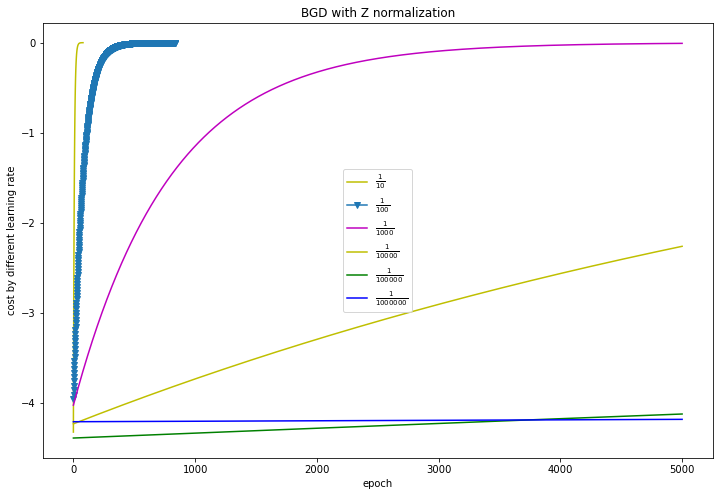

Text(0.5, 1.0, 'BGD with Z normalization')

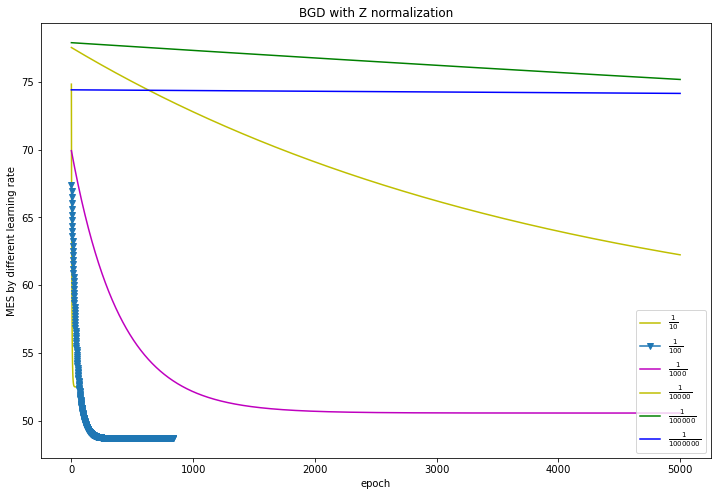

In [4]:
import math
print("*" * 60 )
print("     In 2021, analyze Pitching and Batting impact on MLB by BGD ") 
print("*" * 60 )
epoch = 5000
l_rate = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]
t_errors0 = []
t_errors1 = []
t_errors2 = []
t_errors3 = []
t_errors4 = []
t_errors5 = []
t_errors6 = []
t_errors7 = []

t_MSE0 = []
t_MSE1 = []
t_MSE2 = []
t_MSE3 = []
t_MSE4 = []
t_MSE5 = []
t_MSE6 = []
t_MSE7 = []


X = np.array([
batpitch2021['z_Bat'],
batpitch2021['z_Pitch']
])
Y = np.array(batpitch2021['Rank'])

mX = np.concatenate((np.ones((1,30)),X),axis=0)
print("mX shape: ", mX.shape )

for l_num in (0,1,2,3,4,5):
    t_error = []
## not theta W gonna be 19
    W = np.random.rand(1,3)
    
    for step in range(epoch):
        hat_y = np.dot(W, mX)
        diff = hat_y - Y
        #MSE
        MSE = (diff**2).mean()
        
        t_error = 2*(diff*mX).mean()

        if abs(t_error) < 0.0001 or math.isinf(t_error) or math.isnan(t_error) :
#        if abs(t_error) < 0.0001 or math.isinf(t_error) :
            t_error = backup
            break 

        W = W - l_rate[l_num] * t_error

        if l_num == 0:
            t_errors0.append(t_error)
            t_MSE0.append(MSE)
        elif l_num == 1:
            t_errors1.append(t_error)
            t_MSE1.append(MSE)
        elif l_num == 2:
            t_errors2.append(t_error)
            t_MSE2.append(MSE)
        elif l_num == 3:
            t_errors3.append(t_error)
            t_MSE3.append(MSE)
        elif l_num == 4:
            t_errors4.append(t_error)
            t_MSE4.append(MSE)
        else:
            t_errors5.append(t_error)
            t_MSE5.append(MSE)
        
        backup = t_error
        
        # if step % 200 == 0 :
        #         print("{ learning rate : ", l_rate[l_num] , " step :" , step, "** error : " , t_error,  "## W : " , W , " ### MSE : " , MSE,  " }") 

    print("----" * 15)
    print("{ learning rate : ", l_rate[l_num] , " step :" , step, "** error : " , t_error,  "## W : " , W ,  " ### MSE : " , MSE, " }") 
    print("====" * 15)

plt.figure(figsize=(12,8))
# plt.ylim([-1, 1])
plt.plot(t_errors0 , 'y-')
plt.plot(t_errors1 , 'v-')
plt.plot(t_errors2 , 'm-')
plt.plot(t_errors3 , 'y-')
plt.plot(t_errors4 , 'g-')
plt.plot(t_errors5 , 'b-')
plt.legend([r'$\frac{1}{10}$',r'$\frac{1}{100}$',r'$\frac{1}{1000}$',r'$\frac{1}{10000}$',r'$\frac{1}{100000}$',r'$\frac{1}{1000000}$'])
plt.xlabel('epoch')
plt.ylabel('cost by different learning rate')
plt.title('BGD with Z normalization')

plt.show()

plt.figure(figsize=(12,8))
#plt.ylim([0, 3])
plt.plot(t_MSE0 , 'y-')
plt.plot(t_MSE1 , 'v-')
plt.plot(t_MSE2 , 'm-')
plt.plot(t_MSE3 , 'y-')
plt.plot(t_MSE4 , 'g-')
plt.plot(t_MSE5 , 'b-')
plt.legend([r'$\frac{1}{10}$',r'$\frac{1}{100}$',r'$\frac{1}{1000}$',r'$\frac{1}{10000}$',r'$\frac{1}{100000}$',r'$\frac{1}{1000000}$'])
plt.xlabel('epoch')
plt.ylabel('MES by different learning rate')
plt.title('BGD with Z normalization')


In [5]:
# We know that Pitching is more important than Batting in 2021 by BGD. Pitching 54%, Batting 46%. 
# If we apply the winning rate with this for 50%, Pitching (Run allowed on game) will be 27%, Batting (Run on game) will be 23%
# Now we're ready to make winning rate matrix. 

In [6]:
ALmatchingCSV2021 = currentDir +"\\" + "ALmatching2021.csv"
ALmat_data2021 = pd.read_csv(ALmatchingCSV2021)
NLmatchingCSV2021 = currentDir +"\\" + "NLmatching2021.csv"
NLmat_data2021 = pd.read_csv(NLmatchingCSV2021)

ALmatchingCSV2019 = currentDir +"\\" + "ALmatching2019.csv"
ALmat_data2019 = pd.read_csv(ALmatchingCSV2019)
NLmatchingCSV2019 = currentDir +"\\" + "NLmatching2019.csv"
NLmat_data2019 = pd.read_csv(NLmatchingCSV2019)

# ALmat_data2021.head()
NLmat_data2019.head()


,Tm,ATL19,MIA19,NYM19,PHI19,WSN19,CHC19,CIN19,MIL19,PIT19,STL19,ARI19,COL19,LAD19,SDP19,SFG19
0,ATL19,--,15,11,9,11,5,3,3,5,4,3,3,2,5,5
1,MIA19,4,--,6,10,4,1,1,2,3,3,4,2,1,4,3
2,NYM19,8,13,--,7,12,2,4,1,5,2,5,4,2,3,3
3,PHI19,10,9,12,--,5,5,4,3,4,4,2,4,2,3,3
4,WSN19,8,15,7,14,--,4,5,2,4,2,3,4,3,3,5


In [73]:
def find_rank(team):
    # print("chk :", team[-2:] , " and " , team[0:3]) 
    for i in range(0,30):
        for j in range(0,31):
            if team[-2:] == '21':
                if batpitch2021.loc[j,'Team'] == team[0:3]:
                    return batpitch2021.loc[j,'Rank'], batpitch2021.loc[j,'Bat'], batpitch2021.loc[j,'Pitch']    
            else :
                if batpitch2019.loc[j,'Team'] == team[0:3]:
                    return batpitch2019.loc[j,'Rank'], batpitch2019.loc[j,'Bat'], batpitch2019.loc[j,'Pitch']    


NLlist = ['ATL','MIA','NYM','PHI','WSN','CHC','CIN','MIL','PIT','STL','ARI','COL','LAD','SDP','SFG']
ALlist = ['BAL','BOS','NYY','TBR','TOR','CHW','CLE','DET','KCR','MIN','HOU','LAA','OAK','SEA','TEX']
print(ALmat_data2021)
print(NLmat_data2021)
# for row_index, row in ALmat_data.iterrows():
#     print(row_index)
#     print(row)
    
# print(ALmat_data.loc[0,'BOS'])

dataframe_A = pd.DataFrame(ALmat_data2021)
dataframe_B = pd.DataFrame(NLmat_data2021)
df_TM1 = pd.merge(dataframe_A, dataframe_B, left_on='Tm', right_on='Tm', how='outer')
df_TM1 = df_TM1.fillna('999')
print("# 1 :", df_TM1)

dataframe_C = pd.DataFrame(ALmat_data2019)
dataframe_D = pd.DataFrame(NLmat_data2019)
df_TM2 = pd.merge(dataframe_C, dataframe_D, left_on='Tm', right_on='Tm', how='outer')
df_TM2 = df_TM2.fillna('999')
print("# 2 :", df_TM2)

df_TM = pd.merge(df_TM1, df_TM2, left_on='Tm', right_on='Tm', how='outer')
df_TM = df_TM.fillna('999')
print("# 3 :", df_TM)

# print(df_TM.columns[2])
for i in range(0,60):
    for j in range(1,61):
        # print("Found :", i, j, df_TM.columns[j], df_TM.iloc[i,0])
        col_rank, col_bat, col_pitch = find_rank(df_TM.columns[j])
        row_rank, row_bat, row_pitch = find_rank(df_TM.iloc[i,0])
        forecasting_rate = 0
        
        if df_TM.iloc[i,j] == '999'  :
            # print("CHk ", df_TM.columns[j], "," , df_TM.iloc[i,0])
            # col_rank, col_bat, col_pitch = find_rank(df_TM.columns[j])
            # row_rank, row_bat, row_pitch = find_rank(df_TM.iloc[i,0])
            # print(" cal = ", col_rank, "/" , row_rank)
            # df_TM.iloc[i,j] = round(row_rank / (col_rank + row_rank) , 2)
            learn_from_past = round(row_rank / (col_rank + row_rank) , 3)
        elif df_TM.iloc[i,j] == '--' :
            # df_TM.iloc[i,j] = 999
            learn_from_past = 999
        else:
            # df_TM.iloc[i,j] = round(int(df_TM.iloc[i,j])/19,2)
            # print("chk ### ", i, j , df_TM.columns[j], df_TM.iloc[i,0], df_TM.iloc[i,j], df_TM.iloc[j-1,i+1], type(df_TM.iloc[j-1,i+1]))
            # if int(df_TM.iloc[j-1,i+1]) > 0 and int(df_TM.iloc[j-1,i+1]) < 1:
            # print(type(int(df_TM.iloc[j-1,i+1])), df_TM.iloc[j-1,i+1], int(df_TM.iloc[j-1,i+1]) < 1)
            if int(df_TM.iloc[j-1,i+1]) in range(0,1) :
            # if  "." in df_TM.iloc[j-1,i+1]:
                learn_from_past = round(1 - float(df_TM.iloc[j-1,i+1]),3)
                # print("chk2 simple ### ", float(df_TM.iloc[j-1,i+1]), learn_from_past)
            else:
                total_g = int(df_TM.iloc[i,j]) + int(df_TM.iloc[j-1,i+1])
                learn_from_past = round(int(df_TM.iloc[i,j])/total_g,3)
                # print("chk3 calculate ### ", total_g, df_TM.iloc[i,j], df_TM.iloc[j-1,i+1], learn_from_past)
                # learn_from_past = round(int(df_TM.iloc[i,j])/7,2)
        
        # For pitching ability, smaller value is better. Thus change the sequence to calculate the importance 
        learn_from_ability = round((col_bat / (col_bat+row_bat)) * 0.46 + (col_pitch / (col_pitch+row_pitch)) * 0.54, 3)

        forecasting_rate = round(learn_from_past * 0.5 + learn_from_ability * 0.5, 3)
        
        if j == i+1 and forecasting_rate > 1:
            forecasting_rate = 1
            
        df_TM.iloc[i,j] = forecasting_rate

for i in range(0,60):
    for j in range(1,61):
        chk_1 = float(df_TM.iloc[i,j]) + float(df_TM.iloc[j-1,i+1])
        if chk_1 < 2 and chk_1 != 1:
            df_TM.iloc[j-1,i+1] = round(1 - float(df_TM.iloc[i,j]),3)
            print("chk ### ", i, j , chk_1, df_TM.columns[j], df_TM.iloc[i,0], df_TM.iloc[i,j], df_TM.iloc[j-1,i+1], type(df_TM.iloc[j-1,i+1]))
# print(batpitchdata.loc[0,'Team'], batpitchdata.loc[0,'Rank'] )



print(df_TM)

       Tm BAL21 BOS21 NYY21 TBR21 TOR21 CHW21 CLE21 DET21 KCR21 MIN21 HOU21  \
0   BAL21    --     6     8     1     5     0     2     2     4     2     3   
1   BOS21    13    --    10     8    10     3     4     3     5     5     2   
2   NYY21    11     9    --     8     8     5     4     3     4     6     4   
3   TBR21    18    11    11    --    11     3     6     3     4     3     2   
4   TOR21    14     9    11     8    --     3     5     3     4     4     2   
5   CHW21     7     4     1     3     4    --    10    12     9    13     2   
6   CLE21     5     2     3     1     2     9    --    12    14     8     1   
7   DET21     5     3     3     4     3     7     7    --     8     8     5   
8   KCR21     3     2     2     2     3    10     5    11    --    10     4   
9   MIN21     4     2     1     3     3     6    11    11     9    --     4   
10  HOU21     3     5     2     4     4     5     6     2     3     3    --   
11  LAA21     4     3     4     1     4     5     1 

In [8]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)

In [9]:
# import seaborn as sns  
# df_TM = df_TM.unstack(level=0)
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_TM, annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [67]:
def match(team1, team2):
    # Check routine
    if team1[0:3] not in NLlist and team1[0:3] not in ALlist:
        print("Input team1(=",team1,") is not in MLB. Please check the name of team1")
        return
    if team2[0:3] not in NLlist and team2[0:3] not in ALlist:
        print("Input team2(=",team2,") is not in MLB. Please check the name of team1")
        return
    if team1[-2:] != '19':
        if team1[-2:] != '21':
            print("There are only 2021 and 2019 data in the Matrix.(2020 was not considered /Covid)")
            return
    if team2[-2:] != '19':
        if team2[-2:] != '21':
            print("There are only 2021 and 2019 data in the Matrix.(2020 was not considered /Covid)")
            return
    if len(team1) != 5 or len(team2) != 5:
        print("Input value should be 5 length by team + year (i.e. BOS19 )")
        return
    
    for i in range(0,60):
        for j in range(0,61):
            if df_TM.iloc[i,0] == team1 and df_TM.columns[j] == team2:
                print("Found Result :", df_TM.iloc[i,j])
                return team1, df_TM.iloc[i,j]
            
print(match('BAL21','CLE21'))
print(match('CLE21','BAL21'))
# print(match('BAL2021','CIN2021'))

Found Result : 0.379
('BAL21', 0.379)
Found Result : 0.574
('CLE21', 0.574)
